# phase-space in afro genie files

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline
sns.set(font_scale=2);sns.set_style("whitegrid");

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [3]:
afro_genie_dict = dict()
afro_genie_CC1p_dict = dict()
afro_genie_CC1p_in_cuts_dict = dict()
path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/afro_genie_samples/'
for gname in ['nominal','hA2015','hN2015','hA_SRC']:
    afro_genie_dict[gname] = pd.read_csv(path + 'CC_4_9E20_POT_mA_0_99'+'_'+gname+'.csv')
    print 'loaded',gname
    afro_genie = afro_genie_dict[gname]
    afro_genie_contained = afro_genie[(afro_genie.IsCC_1p_200MeVc==True)
                        & ((afro_genie.v_x>3) & (afro_genie.v_x<256))                        
                        & ((afro_genie.v_y>-115) & (afro_genie.v_y<115))                        
                        & ((afro_genie.v_z>5) & (afro_genie.v_z<1037))                        
                       ]
    afro_genie_in_limits = sample_in_limits(sam=afro_genie_contained
                                   ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'
                                   ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
    afro_genie_CC1p = afro_genie_in_limits[afro_genie_in_limits['IsCC_1p_200MeVc']==True]
    print len(afro_genie_CC1p),'afro GENIE CC1p'
    afro_genie_CC1p_dict[gname] = afro_genie_CC1p    
    # kinematical cuts
    delta_Delta_phi=35 # deg.
    Pt_max=0.35        # GeV/c
    afro_genie_CC1p_in_cuts = afro_genie_CC1p[(afro_genie_CC1p['p_t']<Pt_max)
                                         &(np.abs(afro_genie_CC1p['delta_phi']-180.)<delta_Delta_phi)]

    print len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p in kinematical cuts'
    afro_genie_CC1p_in_cuts_dict[gname] = afro_genie_CC1p_in_cuts    

loaded nominal
39510 afro GENIE CC1p
29245 afro GENIE CC1p in kinematical cuts
loaded hA2015
39904 afro GENIE CC1p
29082 afro GENIE CC1p in kinematical cuts
loaded hN2015
23780 afro GENIE CC1p
17982 afro GENIE CC1p in kinematical cuts
loaded hA_SRC
36266 afro GENIE CC1p
26333 afro GENIE CC1p in kinematical cuts


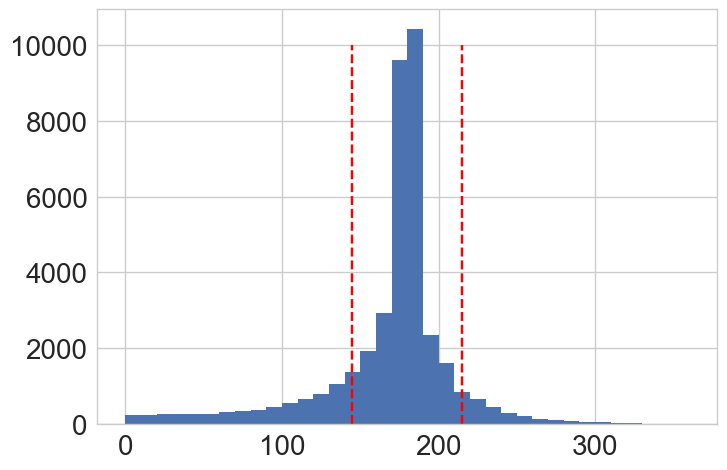

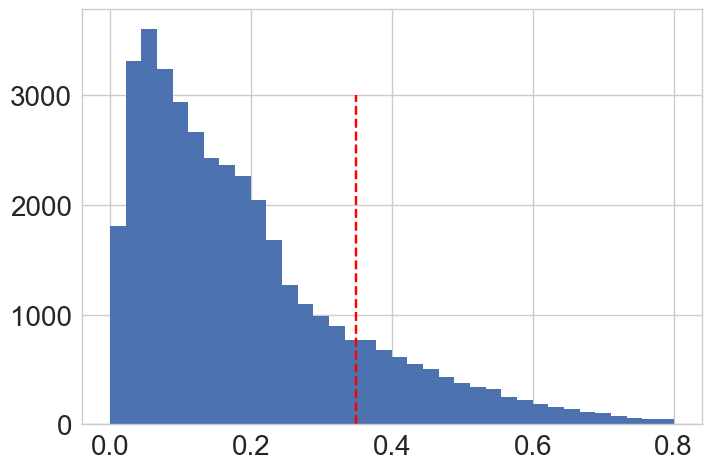

In [11]:
fig,ax=plt.subplots()
plt.hist(afro_genie_CC1p_dict['nominal']['delta_phi'],bins=linspace(0,360,37));
plt.plot([145,145],[0,10000],'--',[215,215],[0,10000],'--',color='red')
fig,ax=plt.subplots()
plt.hist(afro_genie_CC1p_dict['nominal']['p_t'],bins=linspace(0,0.8,37));
plt.plot([0.35,0.35],[0,3000],'--',color='red')